---
---
# Introducción al aprendizaje supervisado: clasificación

En este primer apartado, veremos unas cuantas cuestiones relativas a los problemas predictivos de clasificación, y conoceremos los principales algoritmos que podemos aplicar en este sentido y sus propiedades.



En términos generales, un problema de aprendizaje supervisado se dice que es de **clasificación** cuando la variable respuesta es discreta; i.e., toma un número finito de valores. En el caso más simple, que abordaremos inicialmente, se trata de problemas en los que la variable respuesta es un operador booleano y tenemos que distinguir entre dos clases, como por ejemplo cuando:


*   Queremos distinguir entre fotos de hombres y de mujeres.
*   Queremos decidir cuándo un email es *spam* o no.

Supongamos que nos encontramos en el último de los casos, y tenemos la siguiente variable respuesta, etiquetada con 0 cuando el email no es *spam*, y con 1 cuando sí lo es:



In [1]:
import numpy as np
y_true = np.array([0,1,1,0,0,1,0,0])

Además, por uno de los métodos que estudiaremos más adelante, hemos obtenido las siguientes predicciones:

In [2]:
y_pred = np.array([0,1,0,0,0,1,1,0])

Podemos distinguir cuatro situaciones:

*   Que el valor real sea 0 (no *spam*) y el valor predicho sea también 0 (conocido como *true negative*).
*   Que el valor real sea 0 (no *spam*) y el valor predicho sea 1 (conocido como *false positive* o **error tipo I**).
*   Que el valor real sea 1 (*spam*) y el valor predicho sea 0 (conocido como *false negative* o **error tipo II**).
*   Que el valor real sea 1 (*spam*) y el valor predicho sea también 1 (conocido como *true positive*).

Estos cuatro casos componen lo que se conoce como **matriz de confusión**, y se representa del siguiente modo:

In [3]:
#Escribimos primero los vectores lógicos para que quede más claro
TP_condition = (y_true==1) & (y_pred==1)
FP_condition = (y_true==0) & (y_pred==1)
FN_condition = (y_true==1) & (y_pred==0)
TN_condition = (y_true==0) & (y_pred==0)

#Obtenemos ahora la suma de todos los casos anteriores
TP = len(y_true[TP_condition])
FP = len(y_true[FP_condition])
FN = len(y_true[FN_condition])
TN = len(y_true[TN_condition])

#Calculamos la matriz de confusión
confusion_matrix = np.array([[TP,FP],[FN,TN]])
print(confusion_matrix)

[[2 1]
 [1 4]]


Podemos ahora definir una serie de métricas para medir la calidad de la predicción:

*   *Accuracy*: En términos generales, podríamos decir que hemos acertado 6 de 8 predicciones, luego tendríamos una tasa de acierto del 75%. Sin embargo, esto no tiene en cuenta cuántas predicciones se hacen de cada clase, lo que motiva los siguientes conceptos.
*   *Precision*: Evaluamos únivamente los casos positivos. En este caso, hemos acertado dos de tres casos positivos, por lo que tenemos una *precision* del 66.6%.
*   *Recall*: Evaluamos únicamente los casos negativos. En este caso, hemos acertado cuatro de cinco casos positivos, luego tenemos un *recall* del 80%.
*   *F1-score*: Tiene en cuenta las dos últimas cantidades, y se calcula como 2·(recall·precision)/(recall + precision). En este caso, sería del 72.73%.

Todo ello puede ser obtenido de manera directa con el siguiente método:

In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.67      0.67      0.67         3

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8



Pero, ¿qué pasa cuando nuestro conjunto de datos posee más de dos etiquetas? En tal caso, para usar todo lo anterior, recurrimos a la técnica *One vs Rest*, en la que consideramos para cada etiqueta, el caso "0" como dicha etiqueta, y el caso "1" el resto de etiquetas. Por ejemplo:

In [ ]:
y_true = np.array([0,1,4,3,2,1,4,1,3,1,1,1,0,2])
y_pred = np.array([0,1,4,3,2,1,1,1,3,1,1,4,0,3])
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.83      0.83      0.83         6
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           4       0.50      0.50      0.50         2

    accuracy                           0.79        14
   macro avg       0.80      0.77      0.76        14
weighted avg       0.81      0.79      0.78        14



Finalmente, de cara a preparar y entrenar modelos, cuando dispongamos de un cierto *dataset*, dividiremos nuestros datos en dos compopnentes:

*   Datos de entrenamiento.
*   Datos test.

Los últimos nos permitirán valorar y juzgar si el entrenamiento de los datos ha sido adecuado o no. Para ello, es importante tener en consideración las siguientes cuestiones, sobre las cuales profundizaremos más adelante:

*   Ratio de división.
*   Balanceamiento de datos.
*   En el caso de clasificación, número de elementos de cada clase en ambos datos.

---
---
# Ejemplo: Breast cancer dataset

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

In [6]:
#Dividimos los datos en datos de entrenamiento y datos de validación
X, y = datasets.load_breast_cancer().data, datasets.load_breast_cancer().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

---
---
# Algoritmos

A continuación exponemos algunos de los algoritmos más populares en este área, y los iremos probando con el *dataset* introducido anteriormente:

---
## Modelo logístico

Es quizás el más elemental de todos, y se usa en circunstancias en las que se trata de predecir una variable respuesta binaria, como por ejemplo:

* Si un email es spam o no.
* Si un tumor es benigno o maligno.

Estos modelos pueden ser vistos como un caso particular del modelo lineal generalizado, donde la variable respuesta sigue una variable Bernouilli. También puede aplicarse a problemas donde la variable respuesta tenga múltiples opciones, aplicando la técnica *One vs Rest*.

Para separar ambos niveles, este modelo utiliza la conocida **función sigmoide**, que viene definida como $\sigma(z)=\frac{1}{1-e^{-z}}$. Esta función es la que indicaría la probabilidad del suceso en la distribución de Bernouilli:

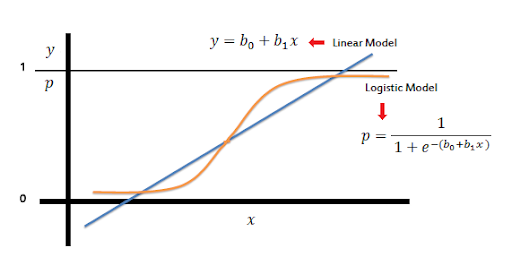

Como ya hemos adelantado, partimos de la hipótesis de que queremos modelizar

$$h_{\theta}(x)=\sigma(\theta^T\cdot x),$$

donde $\theta\in\mathcal{M}(n_{features},1)$ y $h_{\theta}(z)\in\mathcal{B}(p)$. Para estimar los valores de los parámetros $\theta$, introduciremos el **método de descenso gradiente**, que consiste en los pasos:

1. *Forward propagation*: Evaluamos los datos de entrada $X\in\mathcal{M}(n_{samples}, n_{features})$ con la función $h_{\theta}$: $$h_{\theta}(X)=\sigma(X\cdot \theta)$$
2. Calculamos la **función de pérdida**: Si consideramos $y\in\mathcal{M}(n_{features},1)$ las etiquetas originales de los datos, $$ J(\theta)=-\frac{1}{n_{samples}}\left[y^T\cdot\log{(h_{\theta}(X))}+(1-y^T)\cdot\log{(1-h_{\theta}(X))}\right] $$

  Obsérvese que el signo menos hace que esta función sea positiva, ya que en ambos casos el logaritmo es negativo.

3. *Backpropagation*: De cara a minimizar el valor de este función, calculamos el **gradiente** de dicha función:
$$ \frac{\partial J}{\partial \theta_j}=\frac{1}{n_{samples}}X^T(h_{\theta}(X)-y) $$

4. Aplicamos la corrección de los parámetros mediante el gradiente y un cierto **factor de aprendizaje** $\alpha$:
$$\theta_j\mapsto \theta_j-\alpha\frac{\partial J}{\partial \theta_j}$$

Este proceso se podrá repetir durante una serie de iteraciones, conocidas como **epochs**. Realicemos en primer lugar una implementación manual del mismo, en la que además tendremos en cuenta la posible existencia de un **bias**:

In [ ]:
#Creamos una clase que recoja todos los métodos necesarios
class LogisticRegression():
    def __init__(self, alpha=0.01, epochs=1000, fit_intercept=True, verbose=False):
        self.alpha = alpha
        self.epochs = epochs
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)

        # Inicialización de los pesos
        self.theta = np.zeros(X.shape[1])

        for i in range(self.epochs):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.alpha * gradient

            if((self.verbose == True) & (i % 10000 == 0)):
                z = np.dot(X, self.theta)
                h = self.sigmoid(z)
                print(f'loss: {self.loss(h, y)} \t')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)

        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_prob(X).round()

In [4]:
#Instanciamos el modelo
model = LogisticRegression(alpha=0.1, epochs=1000)
#Entrnamos en los datos
model.fit(X_train, y_train)
#Predecimos
y_pred = model.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        48
           1       0.94      0.97      0.95        95

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



C:\Users\ZARAUZ\AppData\Local\Temp\ipykernel_25564\3400894084.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Usando la librería **sklearn**, tenemos una implementación completa del mismo. Recomendamos visitar la documentación para tener información extensa sobre los hiperparámetros de la implementación:

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

---
## K-Nearest Neighbours

Este algoritmo también es muy simple de implementar y, en algunos casos, también es muy efectivo. Intuitivamente, consiste en estudiar el comportamiento de los *K* vecinos de cada punto para determinar puntos nuevos. Su funcionamiento es el siguiente:


1.   Cargamos nuestros datos etiquetados.
2.   Introducimos nuestro nuevo punto sin etiquetar con todas las *features* de los datos anteriores.
3.   Calculamos la distancia del nuevo punto a los puntos de los datos originales.
4.   Ordenamos la lista de forma ascendente.
5.   Seleccionamos los *K* primeros.
6.   Asignamos como etiqueta del valor nuevo la *moda* de los *K* puntos anteriores.


Nótese que este algoritmo puede ser muy sensible a la elección del parámetro *K*:

In [7]:
from scipy.stats import mode

#Creamos una clase que recoja todos los métodos necesarios
class KNN():
    def __init__(self, n_neighbours):
        self.n_neighbours = n_neighbours

    @staticmethod
    def euclidean_distance(vec1, vec2):
      return np.sqrt(np.sum((vec1-vec2)**2, axis = -1))


    def predict(self, X_train, X_test, y_train):
      # Predecimos cada valor de los datos test
      y_pred = np.zeros(X_test.shape[0])
      for test_idx in np.arange(X_test.shape[0]):
        # Calculamos distancias
        distances = np.zeros(y_train.shape[0]) #Inicializamos un array para contener las distancias
        for i in np.arange(y_train.shape[0]):
          distances[i] = self.euclidean_distance(X_train[i,:], X_test[test_idx,:])
        # Obtenemos los índices de los k vecinos más próximos
        optimal_idx = np.argpartition(distances.reshape(-1), self.n_neighbours)[:self.n_neighbours]
        # Asignamos valor predicción
        y_pred[test_idx] = mode(y_train[optimal_idx]).mode
      return y_pred

In [8]:
#Instanciamos modelo
kNN = KNN(3)
#Elaboramos predicciones
y_pred = kNN.predict(X_train, X_test, y_train)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        46
           1       0.95      0.99      0.97        97

    accuracy                           0.96       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



De nuevo, la librería *sklearn* nos ofrece ya una implementación de este método:

In [14]:
from sklearn.neighbors import KNeighborsClassifier
#Parámetros
weights = 'distance'
p = 2
n_neighbours = 5
#Modelo
clf = KNeighborsClassifier(n_neighbors = n_neighbours, weights = weights, p = p)